<a href="https://colab.research.google.com/github/ofoofoo/MoEKAN/blob/main/mlp_and_kan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from tqdm import tqdm

In [48]:
# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define transforms for the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

# Initialize the model, loss function, and optimizer
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
validation_accuracies_mlp_cifar10 = []

with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

validation_accuracy = 100 * (predicted == labels).sum().item() / labels.size(0)
validation_accuracies_mlp_cifar10.append(validation_accuracy)
print(f"Epoch {0}, Validation Accuracy: {validation_accuracy:.2f}%")

for epoch in range(20):  # Number of epochs
    running_loss = 0.0
    correct = 0
    total = 0

    # Training
    model.train()
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validation
    model.eval()
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    validation_accuracy = 100 * correct / total
    validation_accuracies_mlp_cifar10.append(validation_accuracy)
    print(f"Epoch {epoch+1}, Validation Accuracy: {validation_accuracy:.2f}%")

print('Finished Training')

# Output the model and validation accuracies

print("Validation accuracies for each epoch:")
print(validation_accuracies_mlp_cifar10)

torch.save(model.state_dict(), 'cifar10_mlp_model_state_dict.pth')

Files already downloaded and verified
Files already downloaded and verified


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 0, Validation Accuracy: 0.00%
Epoch 1, Validation Accuracy: 45.63%
Epoch 2, Validation Accuracy: 49.14%
Epoch 3, Validation Accuracy: 50.36%
Epoch 4, Validation Accuracy: 52.16%
Epoch 5, Validation Accuracy: 51.21%
Epoch 6, Validation Accuracy: 51.90%
Epoch 7, Validation Accuracy: 52.43%
Epoch 8, Validation Accuracy: 52.61%
Epoch 9, Validation Accuracy: 52.44%
Epoch 10, Validation Accuracy: 52.24%
Epoch 11, Validation Accuracy: 52.73%
Epoch 12, Validation Accuracy: 52.39%
Epoch 13, Validation Accuracy: 52.79%
Epoch 14, Validation Accuracy: 52.88%
Epoch 15, Validation Accuracy: 52.44%
Epoch 16, Validation Accuracy: 51.70%
Epoch 17, Validation Accuracy: 52.77%
Epoch 18, Validation Accuracy: 51.39%
Epoch 19, Validation Accuracy: 51.61%
Epoch 20, Validation Accuracy: 52.04%
Finished Training
Validation accuracies for each epoch:
[0.0, 45.63, 49.14, 50.36, 52.16, 51.21, 51.9, 52.43, 52.61, 52.44, 52.24, 52.73, 52.39, 52.79, 52.88, 52.44, 51.7, 52.77, 51.39, 51.61, 52.04]


In [49]:
validation_accuracies_mlp_cifar10 = [0.0, 44.23, 49.49, 50.58, 51.04, 52.11, 51.38, 51.95, 52.26, 51.95, 52.45, 52.16, 52.19, 52.11, 52.01, 52.33, 51.77, 52.74, 51.3, 51.12, 51.51]

In [50]:
!git clone https://github.com/ZiyaoLi/fast-kan.git

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import sys

# Adjusting the path to include the directory containing the FastKAN module
sys.path.append('/content/fast-kan/fastkan')

# from efficient_kan import KAN
from fastkan import FastKAN as KAN

# Train on MNIST
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

# Load CIFAR-10
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)
trainset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
valset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
valloader = DataLoader(valset, batch_size=64, shuffle=False)

# Define model
model = KAN([3072, 256, 10])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
# Define optimizer
optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)
# Define learning rate scheduler
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.8)

# Define loss
criterion = nn.CrossEntropyLoss()
validation_accuracies_kan_cifar10 = []

with torch.no_grad():
      for images, labels in valloader:
          images = images.view(-1, 3072).to(device)
          output = model(images)
      val_accuracy = ((output.argmax(dim=1) == labels.to(device)).float().mean().item())/len(valloader)
      validation_accuracies_kan_cifar10.append(val_accuracy)
print(
        f"Epoch {0}, Val Accuracy: {val_accuracy}"
    )

for epoch in range(20):
    # Train
    model.train()
    with tqdm(trainloader) as pbar:
        for i, (images, labels) in enumerate(pbar):
            images = images.view(-1, 3072).to(device)
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels.to(device))
            loss.backward()
            optimizer.step()
            accuracy = (output.argmax(dim=1) == labels.to(device)).float().mean()
            pbar.set_postfix(loss=loss.item(), accuracy=accuracy.item(), lr=optimizer.param_groups[0]['lr'])

    # Validation
    model.eval()
    val_loss = 0
    val_accuracy = 0
    with torch.no_grad():
        for images, labels in valloader:
            images = images.view(-1, 3072).to(device)
            output = model(images)
            val_loss += criterion(output, labels.to(device)).item()
            val_accuracy += (
                (output.argmax(dim=1) == labels.to(device)).float().mean().item()
            )
    val_loss /= len(valloader)
    val_accuracy /= len(valloader)
    validation_accuracies_kan_cifar10.append(val_accuracy)

    # Update learning rate
    scheduler.step()

    print(
        f"Epoch {epoch + 1}, Val Loss: {val_loss}, Val Accuracy: {val_accuracy}"
    )
    print(validation_accuracies_kan_cifar10)

torch.save(model.state_dict(), 'cifar10_kan_model_state_dict.pth')

fatal: destination path 'fast-kan' already exists and is not an empty directory.
Files already downloaded and verified
Files already downloaded and verified
Epoch 0, Val Accuracy: 0.0003980891719745223


100%|██████████| 782/782 [00:21<00:00, 35.56it/s, accuracy=0.562, loss=1.43, lr=0.001]


Epoch 1, Val Loss: 1.444101450549569, Val Accuracy: 0.4937300955414013
[0.0003980891719745223, 0.4937300955414013]


100%|██████████| 782/782 [00:22<00:00, 35.33it/s, accuracy=0.5, loss=1.4, lr=0.0008]


Epoch 2, Val Loss: 1.3967269009845271, Val Accuracy: 0.5190087579617835
[0.0003980891719745223, 0.4937300955414013, 0.5190087579617835]


100%|██████████| 782/782 [00:21<00:00, 35.60it/s, accuracy=0.688, loss=1.21, lr=0.00064]


Epoch 3, Val Loss: 1.3485419302229669, Val Accuracy: 0.5371218152866242
[0.0003980891719745223, 0.4937300955414013, 0.5190087579617835, 0.5371218152866242]


100%|██████████| 782/782 [00:21<00:00, 35.70it/s, accuracy=0.562, loss=1.13, lr=0.000512]


Epoch 4, Val Loss: 1.4083770722340627, Val Accuracy: 0.5344347133757962
[0.0003980891719745223, 0.4937300955414013, 0.5190087579617835, 0.5371218152866242, 0.5344347133757962]


100%|██████████| 782/782 [00:22<00:00, 35.49it/s, accuracy=0.688, loss=0.658, lr=0.00041]


Epoch 5, Val Loss: 1.5006616992555606, Val Accuracy: 0.5315485668789809
[0.0003980891719745223, 0.4937300955414013, 0.5190087579617835, 0.5371218152866242, 0.5344347133757962, 0.5315485668789809]


100%|██████████| 782/782 [00:21<00:00, 35.99it/s, accuracy=1, loss=0.25, lr=0.000328]


Epoch 6, Val Loss: 1.538671884567115, Val Accuracy: 0.5410031847133758
[0.0003980891719745223, 0.4937300955414013, 0.5190087579617835, 0.5371218152866242, 0.5344347133757962, 0.5315485668789809, 0.5410031847133758]


100%|██████████| 782/782 [00:21<00:00, 35.82it/s, accuracy=1, loss=0.07, lr=0.000262]


Epoch 7, Val Loss: 1.5953559063042804, Val Accuracy: 0.5419984076433121
[0.0003980891719745223, 0.4937300955414013, 0.5190087579617835, 0.5371218152866242, 0.5344347133757962, 0.5315485668789809, 0.5410031847133758, 0.5419984076433121]


100%|██████████| 782/782 [00:21<00:00, 35.86it/s, accuracy=1, loss=0.0631, lr=0.00021]


Epoch 8, Val Loss: 1.6896160301888825, Val Accuracy: 0.536922770700637
[0.0003980891719745223, 0.4937300955414013, 0.5190087579617835, 0.5371218152866242, 0.5344347133757962, 0.5315485668789809, 0.5410031847133758, 0.5419984076433121, 0.536922770700637]


100%|██████████| 782/782 [00:21<00:00, 36.43it/s, accuracy=1, loss=0.0207, lr=0.000168]


Epoch 9, Val Loss: 1.7453880249315006, Val Accuracy: 0.5413017515923567
[0.0003980891719745223, 0.4937300955414013, 0.5190087579617835, 0.5371218152866242, 0.5344347133757962, 0.5315485668789809, 0.5410031847133758, 0.5419984076433121, 0.536922770700637, 0.5413017515923567]


100%|██████████| 782/782 [00:21<00:00, 36.49it/s, accuracy=1, loss=0.0148, lr=0.000134]


Epoch 10, Val Loss: 1.7876597703642148, Val Accuracy: 0.5421974522292994
[0.0003980891719745223, 0.4937300955414013, 0.5190087579617835, 0.5371218152866242, 0.5344347133757962, 0.5315485668789809, 0.5410031847133758, 0.5419984076433121, 0.536922770700637, 0.5413017515923567, 0.5421974522292994]


100%|██████████| 782/782 [00:22<00:00, 35.22it/s, accuracy=1, loss=0.0163, lr=0.000107]


Epoch 11, Val Loss: 1.8381494781014267, Val Accuracy: 0.5418988853503185
[0.0003980891719745223, 0.4937300955414013, 0.5190087579617835, 0.5371218152866242, 0.5344347133757962, 0.5315485668789809, 0.5410031847133758, 0.5419984076433121, 0.536922770700637, 0.5413017515923567, 0.5421974522292994, 0.5418988853503185]


100%|██████████| 782/782 [00:21<00:00, 36.87it/s, accuracy=1, loss=0.00829, lr=8.59e-5]


Epoch 12, Val Loss: 1.874474858782094, Val Accuracy: 0.5401074840764332
[0.0003980891719745223, 0.4937300955414013, 0.5190087579617835, 0.5371218152866242, 0.5344347133757962, 0.5315485668789809, 0.5410031847133758, 0.5419984076433121, 0.536922770700637, 0.5413017515923567, 0.5421974522292994, 0.5418988853503185, 0.5401074840764332]


100%|██████████| 782/782 [00:21<00:00, 36.78it/s, accuracy=1, loss=0.0126, lr=6.87e-5]


Epoch 13, Val Loss: 1.9232344156617571, Val Accuracy: 0.5414012738853503
[0.0003980891719745223, 0.4937300955414013, 0.5190087579617835, 0.5371218152866242, 0.5344347133757962, 0.5315485668789809, 0.5410031847133758, 0.5419984076433121, 0.536922770700637, 0.5413017515923567, 0.5421974522292994, 0.5418988853503185, 0.5401074840764332, 0.5414012738853503]


100%|██████████| 782/782 [00:21<00:00, 37.02it/s, accuracy=1, loss=0.0079, lr=5.5e-5]


Epoch 14, Val Loss: 1.9631023475318958, Val Accuracy: 0.5399084394904459
[0.0003980891719745223, 0.4937300955414013, 0.5190087579617835, 0.5371218152866242, 0.5344347133757962, 0.5315485668789809, 0.5410031847133758, 0.5419984076433121, 0.536922770700637, 0.5413017515923567, 0.5421974522292994, 0.5418988853503185, 0.5401074840764332, 0.5414012738853503, 0.5399084394904459]


100%|██████████| 782/782 [00:21<00:00, 36.69it/s, accuracy=1, loss=0.0142, lr=4.4e-5]


Epoch 15, Val Loss: 1.9974225812656865, Val Accuracy: 0.5393113057324841
[0.0003980891719745223, 0.4937300955414013, 0.5190087579617835, 0.5371218152866242, 0.5344347133757962, 0.5315485668789809, 0.5410031847133758, 0.5419984076433121, 0.536922770700637, 0.5413017515923567, 0.5421974522292994, 0.5418988853503185, 0.5401074840764332, 0.5414012738853503, 0.5399084394904459, 0.5393113057324841]


100%|██████████| 782/782 [00:21<00:00, 36.30it/s, accuracy=1, loss=0.00171, lr=3.52e-5]


Epoch 16, Val Loss: 2.0322147380014894, Val Accuracy: 0.5383160828025477
[0.0003980891719745223, 0.4937300955414013, 0.5190087579617835, 0.5371218152866242, 0.5344347133757962, 0.5315485668789809, 0.5410031847133758, 0.5419984076433121, 0.536922770700637, 0.5413017515923567, 0.5421974522292994, 0.5418988853503185, 0.5401074840764332, 0.5414012738853503, 0.5399084394904459, 0.5393113057324841, 0.5383160828025477]


100%|██████████| 782/782 [00:21<00:00, 36.39it/s, accuracy=1, loss=0.00336, lr=2.81e-5]


Epoch 17, Val Loss: 2.0638096028832114, Val Accuracy: 0.5392117834394905
[0.0003980891719745223, 0.4937300955414013, 0.5190087579617835, 0.5371218152866242, 0.5344347133757962, 0.5315485668789809, 0.5410031847133758, 0.5419984076433121, 0.536922770700637, 0.5413017515923567, 0.5421974522292994, 0.5418988853503185, 0.5401074840764332, 0.5414012738853503, 0.5399084394904459, 0.5393113057324841, 0.5383160828025477, 0.5392117834394905]


100%|██████████| 782/782 [00:22<00:00, 35.10it/s, accuracy=1, loss=0.00336, lr=2.25e-5]


Epoch 18, Val Loss: 2.0913397453393148, Val Accuracy: 0.5390127388535032
[0.0003980891719745223, 0.4937300955414013, 0.5190087579617835, 0.5371218152866242, 0.5344347133757962, 0.5315485668789809, 0.5410031847133758, 0.5419984076433121, 0.536922770700637, 0.5413017515923567, 0.5421974522292994, 0.5418988853503185, 0.5401074840764332, 0.5414012738853503, 0.5399084394904459, 0.5393113057324841, 0.5383160828025477, 0.5392117834394905, 0.5390127388535032]


100%|██████████| 782/782 [00:22<00:00, 35.43it/s, accuracy=1, loss=0.0033, lr=1.8e-5]


Epoch 19, Val Loss: 2.1181960766482506, Val Accuracy: 0.5367237261146497
[0.0003980891719745223, 0.4937300955414013, 0.5190087579617835, 0.5371218152866242, 0.5344347133757962, 0.5315485668789809, 0.5410031847133758, 0.5419984076433121, 0.536922770700637, 0.5413017515923567, 0.5421974522292994, 0.5418988853503185, 0.5401074840764332, 0.5414012738853503, 0.5399084394904459, 0.5393113057324841, 0.5383160828025477, 0.5392117834394905, 0.5390127388535032, 0.5367237261146497]


100%|██████████| 782/782 [00:22<00:00, 35.34it/s, accuracy=1, loss=0.00205, lr=1.44e-5]


Epoch 20, Val Loss: 2.138869404033491, Val Accuracy: 0.5378184713375797
[0.0003980891719745223, 0.4937300955414013, 0.5190087579617835, 0.5371218152866242, 0.5344347133757962, 0.5315485668789809, 0.5410031847133758, 0.5419984076433121, 0.536922770700637, 0.5413017515923567, 0.5421974522292994, 0.5418988853503185, 0.5401074840764332, 0.5414012738853503, 0.5399084394904459, 0.5393113057324841, 0.5383160828025477, 0.5392117834394905, 0.5390127388535032, 0.5367237261146497, 0.5378184713375797]


In [51]:
validation_accuracies_kan_cifar10 = [0.0003980891719745223, 0.49572054140127386, 0.5171178343949044, 0.5160230891719745, 0.5326433121019108, 0.5324442675159236, 0.5409036624203821, 0.5426950636942676, 0.5416998407643312, 0.5433917197452229, 0.5421974522292994, 0.5451831210191083, 0.5427945859872612, 0.5425955414012739, 0.5423964968152867, 0.5416003184713376, 0.5424960191082803, 0.538515127388535, 0.5423964968152867, 0.5416003184713376, 0.5400079617834395]

([<matplotlib.axis.XTick at 0x7c07c7521270>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

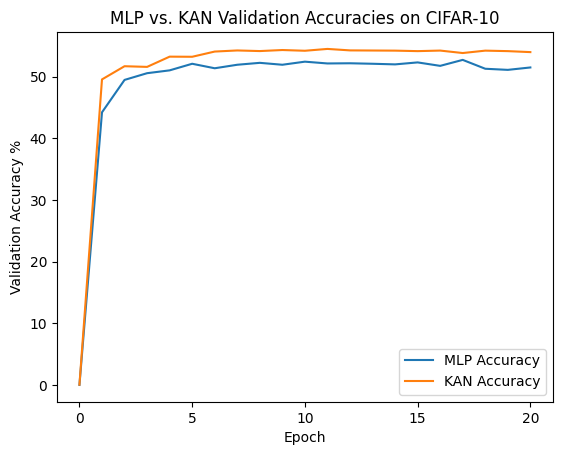

In [52]:
epoch = np.arange(21)
plt.plot(epoch, validation_accuracies_mlp_cifar10, label='MLP Accuracy')
plt.plot(epoch, [100*i for i in validation_accuracies_kan_cifar10], label='KAN Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy %')
plt.title('MLP vs. KAN Validation Accuracies on CIFAR-10')
plt.legend()
plt.xticks(range(0, 21, 5))


In [53]:
# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 100)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define transforms for the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-100 dataset
trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

# Initialize the model, loss function, and optimizer
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
validation_accuracies_mlp_cifar100 = []

with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

validation_accuracy = 100 * (predicted == labels).sum().item() / labels.size(0)
validation_accuracies_mlp_cifar100.append(validation_accuracy)
print(f"Epoch {0}, Validation Accuracy: {validation_accuracy:.2f}%")

for epoch in range(20):  # Number of epochs
    running_loss = 0.0
    correct = 0
    total = 0

    # Training
    model.train()
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validation
    model.eval()
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    validation_accuracy = 100 * correct / total
    validation_accuracies_mlp_cifar100.append(validation_accuracy)
    print(f"Epoch {epoch+1}, Validation Accuracy: {validation_accuracy:.2f}%")

print('Finished Training')

# Output the model and validation accuracies

print("Validation accuracies for each epoch:")
print(validation_accuracies_mlp_cifar100)

torch.save(model.state_dict(), 'cifar100_mlp_model_state_dict.pth')

Files already downloaded and verified
Files already downloaded and verified
Epoch 0, Validation Accuracy: 6.25%
Epoch 1, Validation Accuracy: 16.04%
Epoch 2, Validation Accuracy: 18.39%
Epoch 3, Validation Accuracy: 20.19%
Epoch 4, Validation Accuracy: 19.92%
Epoch 5, Validation Accuracy: 21.07%
Epoch 6, Validation Accuracy: 21.12%
Epoch 7, Validation Accuracy: 22.04%
Epoch 8, Validation Accuracy: 21.63%
Epoch 9, Validation Accuracy: 22.08%
Epoch 10, Validation Accuracy: 21.76%
Epoch 11, Validation Accuracy: 21.81%
Epoch 12, Validation Accuracy: 21.56%
Epoch 13, Validation Accuracy: 21.27%
Epoch 14, Validation Accuracy: 21.17%
Epoch 15, Validation Accuracy: 20.97%
Epoch 16, Validation Accuracy: 20.97%
Epoch 17, Validation Accuracy: 20.58%
Epoch 18, Validation Accuracy: 21.20%
Epoch 19, Validation Accuracy: 20.38%
Epoch 20, Validation Accuracy: 20.44%
Finished Training
Validation accuracies for each epoch:
[6.25, 16.04, 18.39, 20.19, 19.92, 21.07, 21.12, 22.04, 21.63, 22.08, 21.76, 21.8

In [54]:
validation_accuracies_mlp_cifar100 = [0.0, 16.14, 18.26, 19.54, 20.75, 21.3, 21.74, 22.03, 21.77, 21.91, 21.46, 21.24, 21.39, 22.59, 21.58, 21.96, 20.99, 20.76, 21.04, 20.19, 21.04]

In [55]:
!git clone https://github.com/ZiyaoLi/fast-kan.git

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import sys

# Adjusting the path to include the directory containing the FastKAN module
sys.path.append('/content/fast-kan/fastkan')

# from efficient_kan import KAN
from fastkan import FastKAN as KAN

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

# Load CIFAR100
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)
trainset = torchvision.datasets.CIFAR100(
    root="./data", train=True, download=True, transform=transform
)
valset = torchvision.datasets.CIFAR100(
    root="./data", train=False, download=True, transform=transform
)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
valloader = DataLoader(valset, batch_size=64, shuffle=False)

# Define model
model = KAN([3072, 256, 100])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
# Define optimizer
optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)
# Define learning rate scheduler
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.8)

# Define loss
criterion = nn.CrossEntropyLoss()
validation_accuracies_kan_cifar100 = []

with torch.no_grad():
      for images, labels in valloader:
          images = images.view(-1, 3072).to(device)
          output = model(images)
      val_accuracy = ((output.argmax(dim=1) == labels.to(device)).float().mean().item())/len(valloader)
      validation_accuracies_kan_cifar100.append(val_accuracy)
print(
        f"Epoch {0}, Val Accuracy: {val_accuracy}"
    )

for epoch in range(20):
    # Train
    model.train()
    with tqdm(trainloader) as pbar:
        for i, (images, labels) in enumerate(pbar):
            images = images.view(-1, 3072).to(device)
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels.to(device))
            loss.backward()
            optimizer.step()
            accuracy = (output.argmax(dim=1) == labels.to(device)).float().mean()
            pbar.set_postfix(loss=loss.item(), accuracy=accuracy.item(), lr=optimizer.param_groups[0]['lr'])

    # Validation
    model.eval()
    val_loss = 0
    val_accuracy = 0
    with torch.no_grad():
        for images, labels in valloader:
            images = images.view(-1, 3072).to(device)
            output = model(images)
            val_loss += criterion(output, labels.to(device)).item()
            val_accuracy += (
                (output.argmax(dim=1) == labels.to(device)).float().mean().item()
            )
    val_loss /= len(valloader)
    val_accuracy /= len(valloader)
    validation_accuracies_kan_cifar100.append(val_accuracy)

    # Update learning rate
    scheduler.step()

    print(
        f"Epoch {epoch + 1}, Val Loss: {val_loss}, Val Accuracy: {val_accuracy}"
    )
    print(validation_accuracies_kan_cifar100)

torch.save(model.state_dict(), 'cifar100_kan_model_state_dict.pth')


fatal: destination path 'fast-kan' already exists and is not an empty directory.
Files already downloaded and verified
Files already downloaded and verified
Epoch 0, Val Accuracy: 0.0003980891719745223


100%|██████████| 782/782 [00:21<00:00, 37.07it/s, accuracy=0.188, loss=3.82, lr=0.001]


Epoch 1, Val Loss: 3.525869263205559, Val Accuracy: 0.1884952229299363
[0.0003980891719745223, 0.1884952229299363]


100%|██████████| 782/782 [00:21<00:00, 36.68it/s, accuracy=0.438, loss=2.75, lr=0.0008]


Epoch 2, Val Loss: 3.376241740147779, Val Accuracy: 0.22342754777070065
[0.0003980891719745223, 0.1884952229299363, 0.22342754777070065]


100%|██████████| 782/782 [00:21<00:00, 36.62it/s, accuracy=0.312, loss=2.16, lr=0.00064]


Epoch 3, Val Loss: 3.340157212725111, Val Accuracy: 0.234375
[0.0003980891719745223, 0.1884952229299363, 0.22342754777070065, 0.234375]


100%|██████████| 782/782 [00:21<00:00, 36.05it/s, accuracy=0.5, loss=2.67, lr=0.000512]


Epoch 4, Val Loss: 3.3210544388764984, Val Accuracy: 0.24940286624203822
[0.0003980891719745223, 0.1884952229299363, 0.22342754777070065, 0.234375, 0.24940286624203822]


100%|██████████| 782/782 [00:21<00:00, 36.91it/s, accuracy=0.562, loss=1.49, lr=0.00041]


Epoch 5, Val Loss: 3.3820634480494602, Val Accuracy: 0.24930334394904458
[0.0003980891719745223, 0.1884952229299363, 0.22342754777070065, 0.234375, 0.24940286624203822, 0.24930334394904458]


100%|██████████| 782/782 [00:21<00:00, 36.92it/s, accuracy=0.875, loss=0.861, lr=0.000328]


Epoch 6, Val Loss: 3.4909559647748423, Val Accuracy: 0.24731289808917198
[0.0003980891719745223, 0.1884952229299363, 0.22342754777070065, 0.234375, 0.24940286624203822, 0.24930334394904458, 0.24731289808917198]


100%|██████████| 782/782 [00:21<00:00, 35.58it/s, accuracy=0.938, loss=0.576, lr=0.000262]


Epoch 7, Val Loss: 3.573734980479927, Val Accuracy: 0.24422770700636942
[0.0003980891719745223, 0.1884952229299363, 0.22342754777070065, 0.234375, 0.24940286624203822, 0.24930334394904458, 0.24731289808917198, 0.24422770700636942]


100%|██████████| 782/782 [00:20<00:00, 37.87it/s, accuracy=0.875, loss=0.504, lr=0.00021]


Epoch 8, Val Loss: 3.6997614666155187, Val Accuracy: 0.24303343949044587
[0.0003980891719745223, 0.1884952229299363, 0.22342754777070065, 0.234375, 0.24940286624203822, 0.24930334394904458, 0.24731289808917198, 0.24422770700636942, 0.24303343949044587]


100%|██████████| 782/782 [00:20<00:00, 37.89it/s, accuracy=1, loss=0.212, lr=0.000168]


Epoch 9, Val Loss: 3.7756025730424625, Val Accuracy: 0.24104299363057324
[0.0003980891719745223, 0.1884952229299363, 0.22342754777070065, 0.234375, 0.24940286624203822, 0.24930334394904458, 0.24731289808917198, 0.24422770700636942, 0.24303343949044587, 0.24104299363057324]


100%|██████████| 782/782 [00:20<00:00, 37.26it/s, accuracy=0.938, loss=0.273, lr=0.000134]


Epoch 10, Val Loss: 3.84180891437895, Val Accuracy: 0.2392515923566879
[0.0003980891719745223, 0.1884952229299363, 0.22342754777070065, 0.234375, 0.24940286624203822, 0.24930334394904458, 0.24731289808917198, 0.24422770700636942, 0.24303343949044587, 0.24104299363057324, 0.2392515923566879]


100%|██████████| 782/782 [00:21<00:00, 37.21it/s, accuracy=1, loss=0.195, lr=0.000107]


Epoch 11, Val Loss: 3.904736682867548, Val Accuracy: 0.2418391719745223
[0.0003980891719745223, 0.1884952229299363, 0.22342754777070065, 0.234375, 0.24940286624203822, 0.24930334394904458, 0.24731289808917198, 0.24422770700636942, 0.24303343949044587, 0.24104299363057324, 0.2392515923566879, 0.2418391719745223]


100%|██████████| 782/782 [00:22<00:00, 35.52it/s, accuracy=1, loss=0.197, lr=8.59e-5]


Epoch 12, Val Loss: 3.962074103628754, Val Accuracy: 0.24034633757961785
[0.0003980891719745223, 0.1884952229299363, 0.22342754777070065, 0.234375, 0.24940286624203822, 0.24930334394904458, 0.24731289808917198, 0.24422770700636942, 0.24303343949044587, 0.24104299363057324, 0.2392515923566879, 0.2418391719745223, 0.24034633757961785]


100%|██████████| 782/782 [00:22<00:00, 34.89it/s, accuracy=1, loss=0.0688, lr=6.87e-5]


Epoch 13, Val Loss: 4.003687324037977, Val Accuracy: 0.24134156050955413
[0.0003980891719745223, 0.1884952229299363, 0.22342754777070065, 0.234375, 0.24940286624203822, 0.24930334394904458, 0.24731289808917198, 0.24422770700636942, 0.24303343949044587, 0.24104299363057324, 0.2392515923566879, 0.2418391719745223, 0.24034633757961785, 0.24134156050955413]


100%|██████████| 782/782 [00:22<00:00, 35.49it/s, accuracy=1, loss=0.0704, lr=5.5e-5]


Epoch 14, Val Loss: 4.035245031308216, Val Accuracy: 0.238953025477707
[0.0003980891719745223, 0.1884952229299363, 0.22342754777070065, 0.234375, 0.24940286624203822, 0.24930334394904458, 0.24731289808917198, 0.24422770700636942, 0.24303343949044587, 0.24104299363057324, 0.2392515923566879, 0.2418391719745223, 0.24034633757961785, 0.24134156050955413, 0.238953025477707]


100%|██████████| 782/782 [00:21<00:00, 35.89it/s, accuracy=1, loss=0.0656, lr=4.4e-5]


Epoch 15, Val Loss: 4.065886177075137, Val Accuracy: 0.23945063694267515
[0.0003980891719745223, 0.1884952229299363, 0.22342754777070065, 0.234375, 0.24940286624203822, 0.24930334394904458, 0.24731289808917198, 0.24422770700636942, 0.24303343949044587, 0.24104299363057324, 0.2392515923566879, 0.2418391719745223, 0.24034633757961785, 0.24134156050955413, 0.238953025477707, 0.23945063694267515]


100%|██████████| 782/782 [00:22<00:00, 34.84it/s, accuracy=1, loss=0.0466, lr=3.52e-5]


Epoch 16, Val Loss: 4.103982392390063, Val Accuracy: 0.23805732484076433
[0.0003980891719745223, 0.1884952229299363, 0.22342754777070065, 0.234375, 0.24940286624203822, 0.24930334394904458, 0.24731289808917198, 0.24422770700636942, 0.24303343949044587, 0.24104299363057324, 0.2392515923566879, 0.2418391719745223, 0.24034633757961785, 0.24134156050955413, 0.238953025477707, 0.23945063694267515, 0.23805732484076433]


100%|██████████| 782/782 [00:22<00:00, 35.06it/s, accuracy=1, loss=0.0578, lr=2.81e-5]


Epoch 17, Val Loss: 4.128519585178156, Val Accuracy: 0.2385549363057325
[0.0003980891719745223, 0.1884952229299363, 0.22342754777070065, 0.234375, 0.24940286624203822, 0.24930334394904458, 0.24731289808917198, 0.24422770700636942, 0.24303343949044587, 0.24104299363057324, 0.2392515923566879, 0.2418391719745223, 0.24034633757961785, 0.24134156050955413, 0.238953025477707, 0.23945063694267515, 0.23805732484076433, 0.2385549363057325]


100%|██████████| 782/782 [00:22<00:00, 35.11it/s, accuracy=1, loss=0.0449, lr=2.25e-5]


Epoch 18, Val Loss: 4.144059884320399, Val Accuracy: 0.23686305732484075
[0.0003980891719745223, 0.1884952229299363, 0.22342754777070065, 0.234375, 0.24940286624203822, 0.24930334394904458, 0.24731289808917198, 0.24422770700636942, 0.24303343949044587, 0.24104299363057324, 0.2392515923566879, 0.2418391719745223, 0.24034633757961785, 0.24134156050955413, 0.238953025477707, 0.23945063694267515, 0.23805732484076433, 0.2385549363057325, 0.23686305732484075]


100%|██████████| 782/782 [00:23<00:00, 33.31it/s, accuracy=1, loss=0.0334, lr=1.8e-5]


Epoch 19, Val Loss: 4.1626388829225185, Val Accuracy: 0.23935111464968153
[0.0003980891719745223, 0.1884952229299363, 0.22342754777070065, 0.234375, 0.24940286624203822, 0.24930334394904458, 0.24731289808917198, 0.24422770700636942, 0.24303343949044587, 0.24104299363057324, 0.2392515923566879, 0.2418391719745223, 0.24034633757961785, 0.24134156050955413, 0.238953025477707, 0.23945063694267515, 0.23805732484076433, 0.2385549363057325, 0.23686305732484075, 0.23935111464968153]


100%|██████████| 782/782 [00:22<00:00, 34.78it/s, accuracy=1, loss=0.0406, lr=1.44e-5]


Epoch 20, Val Loss: 4.182860081362876, Val Accuracy: 0.23835589171974522
[0.0003980891719745223, 0.1884952229299363, 0.22342754777070065, 0.234375, 0.24940286624203822, 0.24930334394904458, 0.24731289808917198, 0.24422770700636942, 0.24303343949044587, 0.24104299363057324, 0.2392515923566879, 0.2418391719745223, 0.24034633757961785, 0.24134156050955413, 0.238953025477707, 0.23945063694267515, 0.23805732484076433, 0.2385549363057325, 0.23686305732484075, 0.23935111464968153, 0.23835589171974522]


([<matplotlib.axis.XTick at 0x7c07c7d17640>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

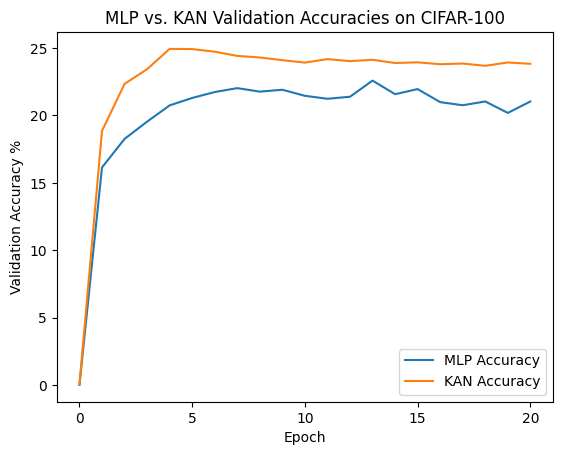

In [56]:
epoch = np.arange(21)
plt.plot(epoch, validation_accuracies_mlp_cifar100, label='MLP Accuracy')
plt.plot(epoch, [100*i for i in validation_accuracies_kan_cifar100], label='KAN Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy %')
plt.title('MLP vs. KAN Validation Accuracies on CIFAR-100')
plt.legend()
plt.xticks(range(0, 21, 5))

In [57]:
# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)  # MNIST images are 28x28
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 100)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define transforms for the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

# Initialize the model, loss function, and optimizer
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
validation_accuracies_mlp_mnist = []

with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

validation_accuracy = 100 * (predicted == labels).sum().item() / labels.size(0)
validation_accuracies_mlp_mnist.append(validation_accuracy)
print(f"Epoch {0}, Validation Accuracy: {validation_accuracy:.2f}%")

for epoch in range(20):  # Number of epochs
    running_loss = 0.0
    correct = 0
    total = 0

    # Training
    model.train()
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validation
    model.eval()
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    validation_accuracy = 100 * correct / total
    validation_accuracies_mlp_mnist.append(validation_accuracy)
    print(f"Epoch {epoch+1}, Validation Accuracy: {validation_accuracy:.2f}%")

print('Finished Training')

# Output the model and validation accuracies

print("Validation accuracies for each epoch:")
print(validation_accuracies_mlp_mnist)

torch.save(model.state_dict(), 'mnist_mlp_model_state_dict.pth')

Epoch 0, Validation Accuracy: 0.00%
Epoch 1, Validation Accuracy: 94.54%
Epoch 2, Validation Accuracy: 96.24%
Epoch 3, Validation Accuracy: 96.08%
Epoch 4, Validation Accuracy: 97.09%
Epoch 5, Validation Accuracy: 97.63%
Epoch 6, Validation Accuracy: 97.45%
Epoch 7, Validation Accuracy: 96.73%
Epoch 8, Validation Accuracy: 97.51%
Epoch 9, Validation Accuracy: 97.14%
Epoch 10, Validation Accuracy: 97.60%
Epoch 11, Validation Accuracy: 97.40%
Epoch 12, Validation Accuracy: 97.43%
Epoch 13, Validation Accuracy: 97.67%
Epoch 14, Validation Accuracy: 97.33%
Epoch 15, Validation Accuracy: 97.78%
Epoch 16, Validation Accuracy: 97.85%
Epoch 17, Validation Accuracy: 97.80%
Epoch 18, Validation Accuracy: 97.93%
Epoch 19, Validation Accuracy: 97.71%
Epoch 20, Validation Accuracy: 97.84%
Finished Training
Validation accuracies for each epoch:
[0.0, 94.54, 96.24, 96.08, 97.09, 97.63, 97.45, 96.73, 97.51, 97.14, 97.6, 97.4, 97.43, 97.67, 97.33, 97.78, 97.85, 97.8, 97.93, 97.71, 97.84]


In [58]:
validation_accuracies_mlp_mnist = [0.0, 95.1, 96.73, 96.42, 96.15, 97.8, 97.64, 97.58, 97.9, 97.63, 97.5, 97.34, 97.42, 97.42, 96.03, 97.34, 97.83, 97.46, 97.62, 97.05, 97.71]

In [59]:
# Load MNIST
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
trainset = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)  # Use MNIST dataset
valset = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)  # Use MNIST dataset
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
valloader = DataLoader(valset, batch_size=64, shuffle=False)

# Define model
model = KAN([784, 256, 10])  # Adjust input size to 784 (28x28), output size to 10 (for MNIST classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define optimizer
optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)

# Define learning rate scheduler
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.8)

# Define loss
criterion = nn.CrossEntropyLoss()
validation_accuracies_kan_mnist = []

with torch.no_grad():
    for images, labels in valloader:
        images = images.view(-1, 784).to(device)  # Adjust input size to 784 (28x28)
        output = model(images)
    val_accuracy = ((output.argmax(dim=1) == labels.to(device)).float().mean().item()) / len(valloader)
    validation_accuracies_kan_mnist.append(val_accuracy)
print(f"Epoch {0}, Val Accuracy: {val_accuracy}")

for epoch in range(20):
    # Train
    model.train()
    with tqdm(trainloader) as pbar:
        for i, (images, labels) in enumerate(pbar):
            images = images.view(-1, 784).to(device)  # Adjust input size to 784 (28x28)
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels.to(device))
            loss.backward()
            optimizer.step()
            accuracy = (output.argmax(dim=1) == labels.to(device)).float().mean()
            pbar.set_postfix(loss=loss.item(), accuracy=accuracy.item(), lr=optimizer.param_groups[0]['lr'])

    # Validation
    model.eval()
    val_loss = 0
    val_accuracy = 0
    with torch.no_grad():
        for images, labels in valloader:
            images = images.view(-1, 784).to(device)  # Adjust input size to 784 (28x28)
            output = model(images)
            val_loss += criterion(output, labels.to(device)).item()
            val_accuracy += ((output.argmax(dim=1) == labels.to(device)).float().mean().item())
    val_loss /= len(valloader)
    val_accuracy /= len(valloader)
    validation_accuracies_kan_mnist.append(val_accuracy)

    # Update learning rate
    scheduler.step()

    print(f"Epoch {epoch + 1}, Val Loss: {val_loss}, Val Accuracy: {val_accuracy}")
    print(validation_accuracies_kan_mnist)

torch.save(model.state_dict(), 'mnist_kan_model_state_dict.pth')

Epoch 0, Val Accuracy: 0.0015923566878980893


100%|██████████| 938/938 [00:20<00:00, 44.96it/s, accuracy=0.906, loss=0.27, lr=0.001]


Epoch 1, Val Loss: 0.17216931028991558, Val Accuracy: 0.9510350318471338
[0.0015923566878980893, 0.9510350318471338]


100%|██████████| 938/938 [00:20<00:00, 46.27it/s, accuracy=0.969, loss=0.204, lr=0.0008]


Epoch 2, Val Loss: 0.1574047013974873, Val Accuracy: 0.9510350318471338
[0.0015923566878980893, 0.9510350318471338, 0.9510350318471338]


100%|██████████| 938/938 [00:20<00:00, 46.82it/s, accuracy=1, loss=0.031, lr=0.00064]


Epoch 3, Val Loss: 0.12472753339724402, Val Accuracy: 0.9631767515923567
[0.0015923566878980893, 0.9510350318471338, 0.9510350318471338, 0.9631767515923567]


100%|██████████| 938/938 [00:20<00:00, 46.07it/s, accuracy=1, loss=0.00713, lr=0.000512]


Epoch 4, Val Loss: 0.10459722055045882, Val Accuracy: 0.9688495222929936
[0.0015923566878980893, 0.9510350318471338, 0.9510350318471338, 0.9631767515923567, 0.9688495222929936]


100%|██████████| 938/938 [00:20<00:00, 45.72it/s, accuracy=1, loss=0.0091, lr=0.00041]


Epoch 5, Val Loss: 0.10787740168565807, Val Accuracy: 0.9674562101910829
[0.0015923566878980893, 0.9510350318471338, 0.9510350318471338, 0.9631767515923567, 0.9688495222929936, 0.9674562101910829]


100%|██████████| 938/938 [00:20<00:00, 45.76it/s, accuracy=1, loss=0.00814, lr=0.000328]


Epoch 6, Val Loss: 0.09268355227635719, Val Accuracy: 0.9721337579617835
[0.0015923566878980893, 0.9510350318471338, 0.9510350318471338, 0.9631767515923567, 0.9688495222929936, 0.9674562101910829, 0.9721337579617835]


100%|██████████| 938/938 [00:19<00:00, 47.53it/s, accuracy=1, loss=0.0193, lr=0.000262]


Epoch 7, Val Loss: 0.0782727257548431, Val Accuracy: 0.9775079617834395
[0.0015923566878980893, 0.9510350318471338, 0.9510350318471338, 0.9631767515923567, 0.9688495222929936, 0.9674562101910829, 0.9721337579617835, 0.9775079617834395]


100%|██████████| 938/938 [00:19<00:00, 46.96it/s, accuracy=1, loss=0.00052, lr=0.00021]


Epoch 8, Val Loss: 0.08085427793178201, Val Accuracy: 0.9783041401273885
[0.0015923566878980893, 0.9510350318471338, 0.9510350318471338, 0.9631767515923567, 0.9688495222929936, 0.9674562101910829, 0.9721337579617835, 0.9775079617834395, 0.9783041401273885]


100%|██████████| 938/938 [00:21<00:00, 43.05it/s, accuracy=1, loss=0.00147, lr=0.000168]


Epoch 9, Val Loss: 0.07825306637478555, Val Accuracy: 0.9785031847133758
[0.0015923566878980893, 0.9510350318471338, 0.9510350318471338, 0.9631767515923567, 0.9688495222929936, 0.9674562101910829, 0.9721337579617835, 0.9775079617834395, 0.9783041401273885, 0.9785031847133758]


100%|██████████| 938/938 [00:20<00:00, 45.45it/s, accuracy=1, loss=0.000737, lr=0.000134]


Epoch 10, Val Loss: 0.07428163105332657, Val Accuracy: 0.9791998407643312
[0.0015923566878980893, 0.9510350318471338, 0.9510350318471338, 0.9631767515923567, 0.9688495222929936, 0.9674562101910829, 0.9721337579617835, 0.9775079617834395, 0.9783041401273885, 0.9785031847133758, 0.9791998407643312]


100%|██████████| 938/938 [00:20<00:00, 45.71it/s, accuracy=1, loss=0.000344, lr=0.000107]


Epoch 11, Val Loss: 0.07581217787129349, Val Accuracy: 0.9795979299363057
[0.0015923566878980893, 0.9510350318471338, 0.9510350318471338, 0.9631767515923567, 0.9688495222929936, 0.9674562101910829, 0.9721337579617835, 0.9775079617834395, 0.9783041401273885, 0.9785031847133758, 0.9791998407643312, 0.9795979299363057]


100%|██████████| 938/938 [00:19<00:00, 47.09it/s, accuracy=1, loss=0.000254, lr=8.59e-5]


Epoch 12, Val Loss: 0.07577508872869819, Val Accuracy: 0.9798964968152867
[0.0015923566878980893, 0.9510350318471338, 0.9510350318471338, 0.9631767515923567, 0.9688495222929936, 0.9674562101910829, 0.9721337579617835, 0.9775079617834395, 0.9783041401273885, 0.9785031847133758, 0.9791998407643312, 0.9795979299363057, 0.9798964968152867]


100%|██████████| 938/938 [00:19<00:00, 47.27it/s, accuracy=1, loss=0.00114, lr=6.87e-5]


Epoch 13, Val Loss: 0.07758520606157211, Val Accuracy: 0.9795979299363057
[0.0015923566878980893, 0.9510350318471338, 0.9510350318471338, 0.9631767515923567, 0.9688495222929936, 0.9674562101910829, 0.9721337579617835, 0.9775079617834395, 0.9783041401273885, 0.9785031847133758, 0.9791998407643312, 0.9795979299363057, 0.9798964968152867, 0.9795979299363057]


100%|██████████| 938/938 [00:20<00:00, 46.05it/s, accuracy=1, loss=0.000175, lr=5.5e-5]


Epoch 14, Val Loss: 0.07858442159977709, Val Accuracy: 0.9794984076433121
[0.0015923566878980893, 0.9510350318471338, 0.9510350318471338, 0.9631767515923567, 0.9688495222929936, 0.9674562101910829, 0.9721337579617835, 0.9775079617834395, 0.9783041401273885, 0.9785031847133758, 0.9791998407643312, 0.9795979299363057, 0.9798964968152867, 0.9795979299363057, 0.9794984076433121]


100%|██████████| 938/938 [00:21<00:00, 44.65it/s, accuracy=1, loss=6.11e-5, lr=4.4e-5]


Epoch 15, Val Loss: 0.07998007986101306, Val Accuracy: 0.9792993630573248
[0.0015923566878980893, 0.9510350318471338, 0.9510350318471338, 0.9631767515923567, 0.9688495222929936, 0.9674562101910829, 0.9721337579617835, 0.9775079617834395, 0.9783041401273885, 0.9785031847133758, 0.9791998407643312, 0.9795979299363057, 0.9798964968152867, 0.9795979299363057, 0.9794984076433121, 0.9792993630573248]


100%|██████████| 938/938 [00:20<00:00, 46.32it/s, accuracy=1, loss=0.000406, lr=3.52e-5]


Epoch 16, Val Loss: 0.07892821461250547, Val Accuracy: 0.9795979299363057
[0.0015923566878980893, 0.9510350318471338, 0.9510350318471338, 0.9631767515923567, 0.9688495222929936, 0.9674562101910829, 0.9721337579617835, 0.9775079617834395, 0.9783041401273885, 0.9785031847133758, 0.9791998407643312, 0.9795979299363057, 0.9798964968152867, 0.9795979299363057, 0.9794984076433121, 0.9792993630573248, 0.9795979299363057]


100%|██████████| 938/938 [00:20<00:00, 46.49it/s, accuracy=1, loss=0.00045, lr=2.81e-5]


Epoch 17, Val Loss: 0.07997778836052948, Val Accuracy: 0.9800955414012739
[0.0015923566878980893, 0.9510350318471338, 0.9510350318471338, 0.9631767515923567, 0.9688495222929936, 0.9674562101910829, 0.9721337579617835, 0.9775079617834395, 0.9783041401273885, 0.9785031847133758, 0.9791998407643312, 0.9795979299363057, 0.9798964968152867, 0.9795979299363057, 0.9794984076433121, 0.9792993630573248, 0.9795979299363057, 0.9800955414012739]


100%|██████████| 938/938 [00:20<00:00, 45.53it/s, accuracy=1, loss=7.66e-5, lr=2.25e-5]


Epoch 18, Val Loss: 0.0795369040814511, Val Accuracy: 0.9798964968152867
[0.0015923566878980893, 0.9510350318471338, 0.9510350318471338, 0.9631767515923567, 0.9688495222929936, 0.9674562101910829, 0.9721337579617835, 0.9775079617834395, 0.9783041401273885, 0.9785031847133758, 0.9791998407643312, 0.9795979299363057, 0.9798964968152867, 0.9795979299363057, 0.9794984076433121, 0.9792993630573248, 0.9795979299363057, 0.9800955414012739, 0.9798964968152867]


100%|██████████| 938/938 [00:20<00:00, 44.97it/s, accuracy=1, loss=9.01e-5, lr=1.8e-5]


Epoch 19, Val Loss: 0.08020847631405559, Val Accuracy: 0.9800955414012739
[0.0015923566878980893, 0.9510350318471338, 0.9510350318471338, 0.9631767515923567, 0.9688495222929936, 0.9674562101910829, 0.9721337579617835, 0.9775079617834395, 0.9783041401273885, 0.9785031847133758, 0.9791998407643312, 0.9795979299363057, 0.9798964968152867, 0.9795979299363057, 0.9794984076433121, 0.9792993630573248, 0.9795979299363057, 0.9800955414012739, 0.9798964968152867, 0.9800955414012739]


100%|██████████| 938/938 [00:20<00:00, 45.16it/s, accuracy=1, loss=0.000209, lr=1.44e-5]


Epoch 20, Val Loss: 0.08090068824281962, Val Accuracy: 0.9800955414012739
[0.0015923566878980893, 0.9510350318471338, 0.9510350318471338, 0.9631767515923567, 0.9688495222929936, 0.9674562101910829, 0.9721337579617835, 0.9775079617834395, 0.9783041401273885, 0.9785031847133758, 0.9791998407643312, 0.9795979299363057, 0.9798964968152867, 0.9795979299363057, 0.9794984076433121, 0.9792993630573248, 0.9795979299363057, 0.9800955414012739, 0.9798964968152867, 0.9800955414012739, 0.9800955414012739]


In [62]:
validation_accuracies_kan_mnist = [0.0015923566878980893, 0.9510350318471338, 0.9510350318471338, 0.9631767515923567, 0.9688495222929936, 0.9674562101910829, 0.9721337579617835, 0.9775079617834395, 0.9783041401273885, 0.9785031847133758, 0.9791998407643312, 0.9795979299363057, 0.9798964968152867, 0.9795979299363057, 0.9794984076433121, 0.9792993630573248, 0.9795979299363057, 0.9800955414012739, 0.9798964968152867, 0.9800955414012739, 0.9800955414012739]

21


([<matplotlib.axis.XTick at 0x7c07c760b2e0>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

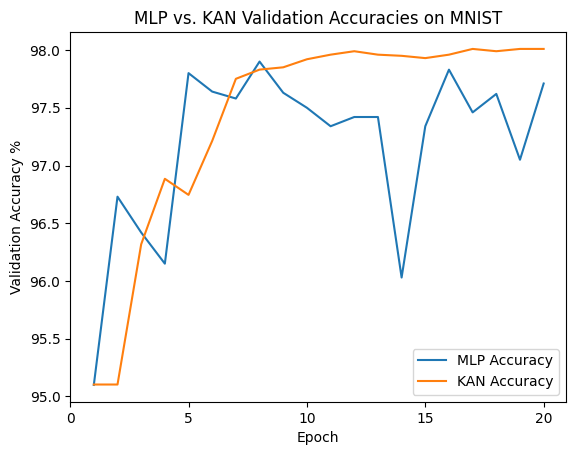

In [66]:
epoch = np.arange(21)
print(len(validation_accuracies_kan_mnist))
plt.plot(epoch[1:], validation_accuracies_mlp_mnist[1:], label='MLP Accuracy')
plt.plot(epoch[1:], [100*i for i in validation_accuracies_kan_mnist][1:], label='KAN Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy %')
plt.title('MLP vs. KAN Validation Accuracies on MNIST')
plt.legend()
plt.xticks(range(0, 21, 5))